
\begin{center}
Chun-Yuan (Scott) Chiu
\end{center}
\begin{center}
chunyuac@andrew.cmu.edu
\end{center}

# 1. {-}

## 1.1 {-}

Here is what will happen if performing PCA without rescaling first. 
First note that, as shown in the below tables, in the original data there are penny stocks like 58.com as well as stock prices as high as $\$$1200, like iStar. Since large jumps in the time series are rare, iStar's closing prices from the 30 days considered will all likely be somewhat close to $\$$1200. Thus iStar's stock price time series, as a 30-dimensional data point, will be in a neighborhood of $(1200, 1200, \ldots, 1200)$. Similarly the the time series of 58.com will be in a neighborhood of $(0.4, 0.4, \ldots, 0.4)$. The same will happen to all stocks, so the original data set is merely 1000 data points, all close to a line with parametric form $t(1, 1, \ldots, 1)$. This would be the first principal component (PC) which explains almost all the movements of the data points. Without rescaling, this would be the only structure we find in the data. 

In the solution of 1.2 below we also show the PCA results on the original data without rescaling, to confirm the above argument. 

In [1]:
import pandas as pd
from sklearn.preprocessing import Normalizer

stock_orig = pd.read_csv('stocksample.txt', sep='\t', index_col='symb')
stock_orig.min().head(), stock_orig.max().head()

(name          58.com Inc.
 2017-08-18           0.32
 2017-08-21           0.35
 2017-08-22           0.45
 2017-08-23           0.45
 dtype: object,
 name          iStar Financial Inc.
 2017-08-18                 1290.11
 2017-08-21                 1290.14
 2017-08-22                 1290.11
 2017-08-23                 1289.16
 dtype: object)

Below we remove unnecessary columns and then demean and scale each time series to have variance 1. 

In [2]:
stock = stock_orig.iloc[:, 3:].T
stock = ((stock - stock.mean())/stock.std()).T

## 1.2 {-}

We define the ```pca_plots()``` function that, given the data, performs PCA on it and generates the scree plot and a plot of the first 3 principal components. We then show the results on 3 data sets: the original stock prices without rescaling, the scaled stock prices, and paths of a random walk. 


The results on the scaled stock prices show that the first PC is a momentum towards the same direction the entire month, which explains about 40% of the data movements. Since a PC score can be negative, it is not specified if this is a upward or downward trend. The second PC is a pattern where the stock goes towards one direction in the first half of the month then comes back in the second half, which explains around 20% of the data movements. Again, since a PC score can be negative, it is not specified in this pattern if the stock goes down in the beginning and recovers later or the other way around. In the third PC, which explains another 10% of the data movement, we see the trend changes the direction twice in a month. 

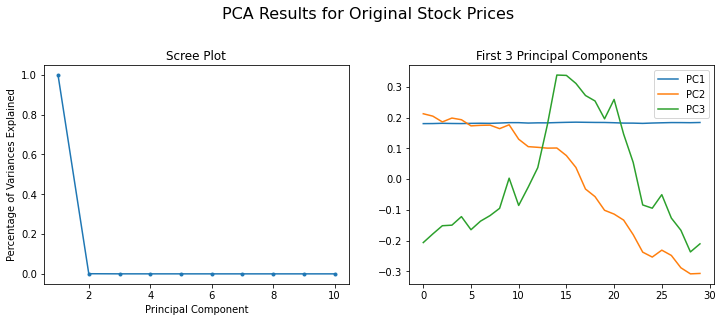

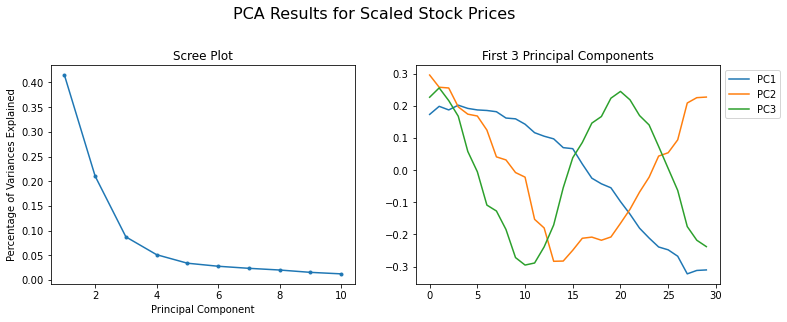

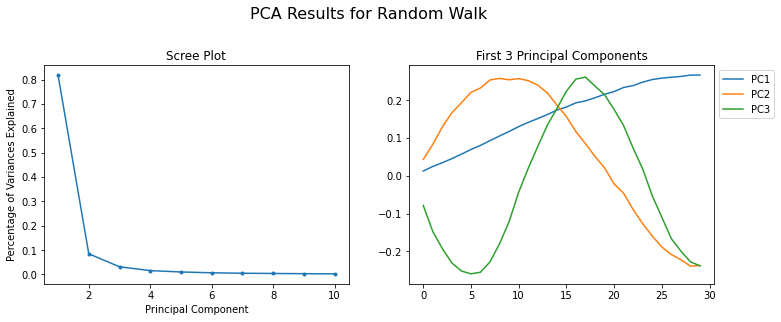

In [4]:
from scipy.stats import norm
from pandas import DataFrame, Series
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
random_walk = DataFrame([norm.rvs(size=30).cumsum() for _ in range(1000)])

def pca_plots(data, suptitle):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
    
    n_components = 10
    pcaout = PCA(n_components=n_components).fit(data)
    Series(pcaout.explained_variance_ratio_, index=range(1, n_components+1)).plot(style='.-', ax=ax[0])
    DataFrame(pcaout.components_[:3].T, columns=['PC1', 'PC2', 'PC3']).plot(ax=ax[1], legend=None)
    
    ax[0].set(title='Scree Plot', ylabel='Percentage of Variances Explained', xlabel='Principal Component')
    ax[1].set(title='First 3 Principal Components')
    
    plt.suptitle(suptitle, fontsize=16)
    plt.subplots_adjust(top=0.8)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

pca_plots(stock_orig.iloc[:, 3:], 'PCA Results for Original Stock Prices')
pca_plots(stock, 'PCA Results for Scaled Stock Prices')
pca_plots(random_walk, 'PCA Results for Random Walk')

## 1.3 {-}

# 2. {-}

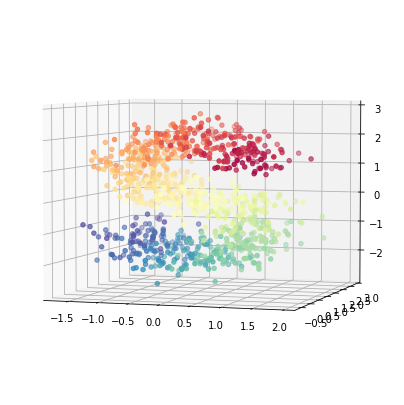

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

n_points = 1000
Scurve, Scolor = datasets.make_s_curve(n_points, random_state=0)
noise = np.matrix(np.random.normal(0, .3, 3000)).reshape(1000,3)
Snoise = Scurve + noise

fig = plt.figure(figsize=(7, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Snoise[:, 0], Snoise[:, 1], Snoise[:, 2], c=Scolor, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
plt.show()

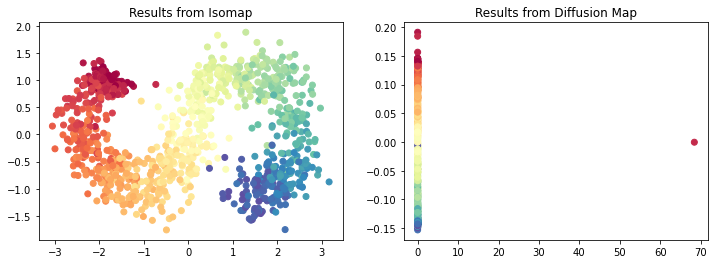

In [21]:
from pydiffmap import diffusion_map as dm
from sklearn import manifold

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

dmap = dm.DiffusionMap.from_sklearn(n_evecs=3, epsilon="bgh")
Snoisediffmap = dmap.fit_transform(Snoise)
Y = manifold.Isomap(n_neighbors=10, n_components=2).fit_transform(Snoise)

ax[0].scatter(Y[:, 0], Y[:, 1], c=Scolor, cmap=plt.cm.Spectral)
ax[0].set(title='Results from Isomap')

ax[1].scatter(Snoisediffmap[:, 0], Snoisediffmap[:, 1], c=Scolor, cmap=plt.cm.Spectral)
ax[1].set(title='Results from Diffusion Map')
plt.show()

# 3. {-}

In [5]:
stock = stock.T
stock.describe()[1:3]

symb,NEWM,DMO,VMW,CCI,MNK,CMD,MTU,XIN,INB,BOX,...,LL,RRD,OUT,VNTR,GWW,XNY,FLY,JGH,MPO,GIS
mean,4.914587e-15,-6.328271e-15,-4.141132e-15,-2.760755e-15,-2.379578e-15,-2.427688e-15,7.993606e-15,-2.146431e-15,4.124108e-14,-7.438494e-16,...,-2.164935e-15,2.442491e-15,4.500104e-15,3.922788e-16,-1.332268e-16,2.181588e-15,1.273056e-15,4.101904e-14,6.476301e-16,3.523108e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [53]:
# stock = stock.iloc[:, :5]

In [6]:
stock['dateIdx'] = range(30)

In [7]:
import rpy2
%load_ext rpy2.ipython

In [8]:
%%R -i stock -o optspan

library(fANCOVA)

optspan <- list()

for (ticker in colnames(stock))
{
    holdlo = loess.as(stock$dateIdx, stock[[ticker]], criterion='aicc')
    optspan[[ticker]] <- holdlo$pars$span
}

R[write to console]: fANCOVA 0.5-1 loaded



In [9]:
stock.drop('dateIdx', axis='columns', inplace=True)

In [10]:
span = {k: 1-0.9*(1-v[0]) for k, v in optspan.items()}

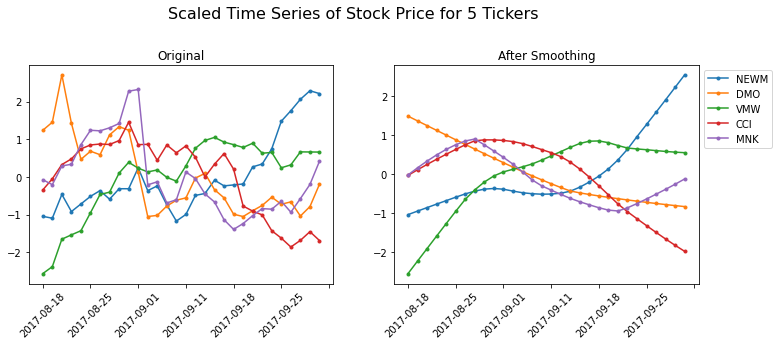

In [11]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import DataFrame

smooth = DataFrame(index=stock.index)

for ticker in stock.columns:
    lowout = sm.nonparametric.lowess(stock[ticker], range(30), frac=span[ticker])
    smooth[ticker] = lowout[:, 1]

fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
stock.iloc[:, :5].plot(style='.-', rot=45, ax=ax[0], legend=None, title='Original')
smooth.iloc[:, :5].plot(style='.-', rot=45, ax=ax[1], legend=None, title='After Smoothing')

plt.suptitle('Scaled Time Series of Stock Price for 5 Tickers', fontsize=16)
plt.subplots_adjust(top=0.80)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [60]:
# smooth.T.to_csv('stocksmooth.csv')

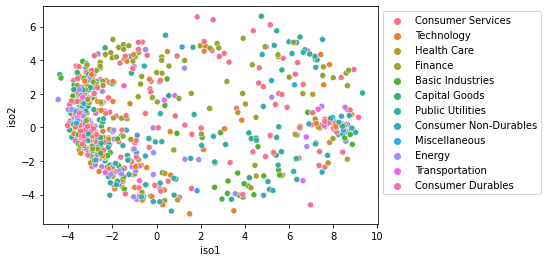

In [12]:
from pandas import DataFrame
from sklearn import manifold
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

stock_orig = pd.read_csv('stocksample.txt', sep='\t', index_col='symb')
smooth = pd.read_csv('stocksmooth.csv', index_col=0)
isoout = DataFrame(
    manifold.Isomap(n_neighbors=10, n_components=2).fit_transform(smooth), 
#     columns=['iso1', 'iso2', 'iso3', 'iso4', 'iso5'])
    columns=['iso1', 'iso2'])
isoout['sector'] = stock_orig['sector'].values

sns.scatterplot(x='iso1', y='iso2', data=isoout, hue='sector')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


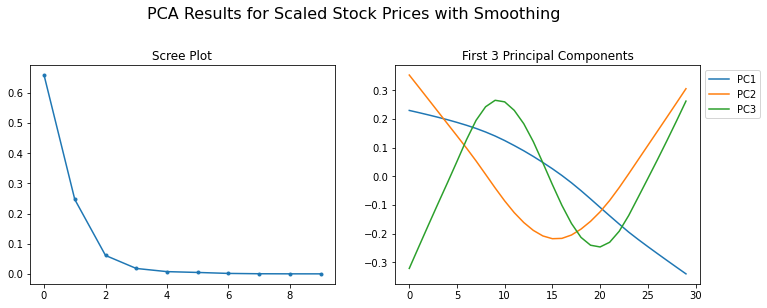

In [13]:
pca_plots(smooth, 'PCA Results for Scaled Stock Prices with Smoothing')

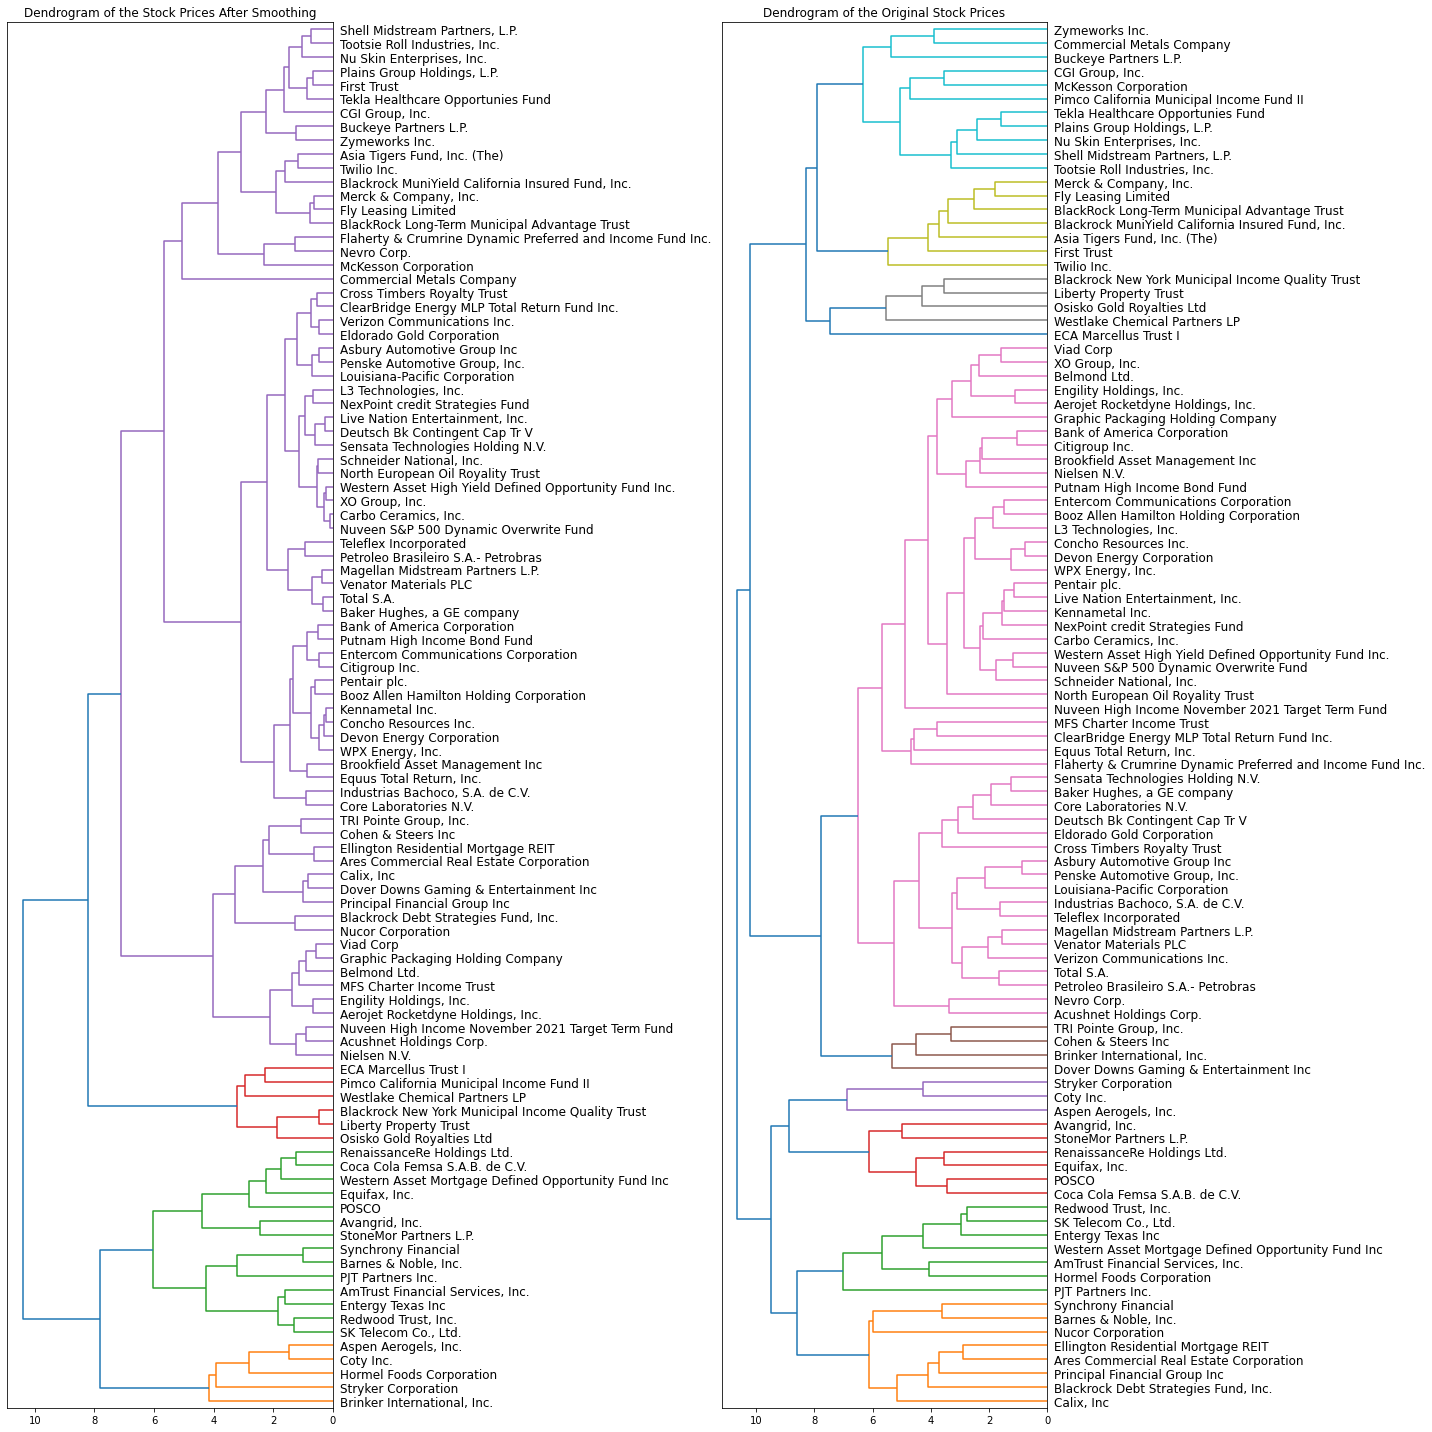

In [77]:
import numpy as np

np.random.seed(0)
smooth100 = smooth.loc[np.random.choice(smooth.index, size=100, replace=False)]
hcoutsmooth = hierarchy.linkage(smooth100, method="complete")

stock100 = stock.T.loc[smooth100.index]
hcoutstock = hierarchy.linkage(stock100, method='complete')


fig, ax = plt.subplots(1, 2, figsize=[20, 20])
labs = stock_orig['name'][smooth100.index]
hierarchy.dendrogram(hcoutsmooth, ax=ax[0], orientation='left', labels=labs, leaf_font_size=12)
hierarchy.dendrogram(hcoutstock, ax=ax[1], orientation='left', labels=labs, leaf_font_size=12)

ax[0].set(title='Dendrogram of the Stock Prices After Smoothing')
ax[1].set(title='Dendrogram of the Original Stock Prices')

plt.tight_layout()
plt.show()